In [1]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("ggplot2")
install.packages("cowplot")
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpBMgy5l/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpBMgy5l/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpBMgy5l/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpBMgy5l/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpBMgy5l/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpBMgy5l/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpBMgy5l/downloaded_packages


In [1]:
objective <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/fieldwork/objective_table.csv")

# Statistical testing

In [35]:
ruralavgs<- c(1.960, 1.668, 2.570, 2.293, 1.485, 2.820, 1.230, 3.430, 2.497, 2.607, 2.950, 
            1.687, 1.276, 2.447, 3.270, 2.960, 2.337, 3.053, 2.485, 3.543, 3.277, 1.860, 
            3.333, 3.030, 1.915)
urbanavgs <- c(1.823333333, 2.9325, 3.573333333, 2.126666667, 1.226666667, 2.106666667, 2.1)
ruralstdves <- c(0.941, 0.826, 1.071, 1.070, 0.106, 0.632, 0.300, 0.325, 
               0.261, 0.883, 0.622, 0.604, 1.276, 0.181, 0.583, 0.468, 
               0.735, 0.509, 0.894, 0.110, 0.291, 0.368, 0.483, 0.679, 1.294)
urbanstdevs <- c(0.617764788, 0.3365016097, 0.47648015, 0.3178574104, 
               0.4123509832, 0.5076416059)

In [40]:
are_they_different<- function(dataset1, dataset2){
    shapiro_test1 <- shapiro.test(dataset1)
    shapiro_test2 <- shapiro.test(dataset2)

    print("Shapiro-Wilk test: H0 is that they are samples from a normally distributed population")
    print(paste("Shapiro-Wilk test p-value for dataset 1:", shapiro_test1$p.value))
    print(paste("Shapiro-Wilk test p-value for dataset 2:", shapiro_test2$p.value))

    # Perform t-test or Mann-Whitney U test based on normality
    if (shapiro_test1$p.value > 0.05 && shapiro_test2$p.value > 0.05) {
    test_result <- t.test(dataset1, dataset2)
    test_type <- "t-test"
    } else {
    test_result <- wilcox.test(dataset1, dataset2)
    test_type <- "Mann-Whitney U test"
    }

    # Print the test result
    print(test_result)
    print(paste("Test type used:", test_type))

}

are_they_different(ruralavgs, urbanavgs)
are_they_different(ruralstdves, urbanstdevs)

[1] "Shapiro-Wilk test: H0 is that they are samples from a normally distributed population"
[1] "Shapiro-Wilk test p-value for dataset 1: 0.302917915124995"
[1] "Shapiro-Wilk test p-value for dataset 2: 0.528971912384719"

	Welch Two Sample t-test

data:  dataset1 and dataset2
t = 0.65371, df = 8.9743, p-value = 0.5297
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5156374  0.9345155
sample estimates:
mean of x mean of y 
 2.479320  2.269881 

[1] "Test type used: t-test"
[1] "Shapiro-Wilk test: H0 is that they are samples from a normally distributed population"
[1] "Shapiro-Wilk test p-value for dataset 1: 0.42661925607632"
[1] "Shapiro-Wilk test p-value for dataset 2: 0.765731606967999"

	Welch Two Sample t-test

data:  dataset1 and dataset2
t = 2.1166, df = 25.673, p-value = 0.04415
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.00496033 0.34646749
sample estimates:
mean of

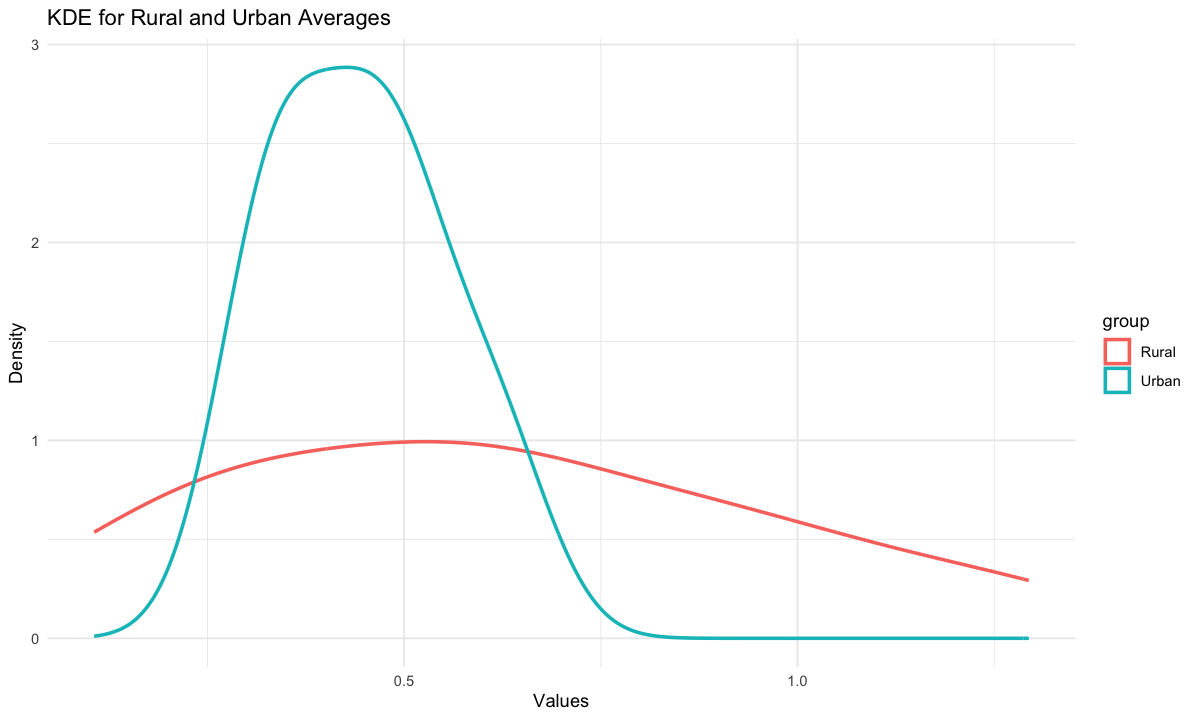

In [43]:
data <- data.frame(
  value = c(ruralstdves, urbanstdevs),
  group = c(rep("Rural", length(ruralstdves)), rep("Urban", length(urbanstdevs)))
)

# Plot the KDE for both datasets
ggplot(data, aes(x = value, color = group)) +
  geom_density(size = 1) +      # Add KDE plots for both groups
  labs(title = "KDE for Rural and Urban Averages", 
       x = "Values", 
       y = "Density") +
  theme_minimal()

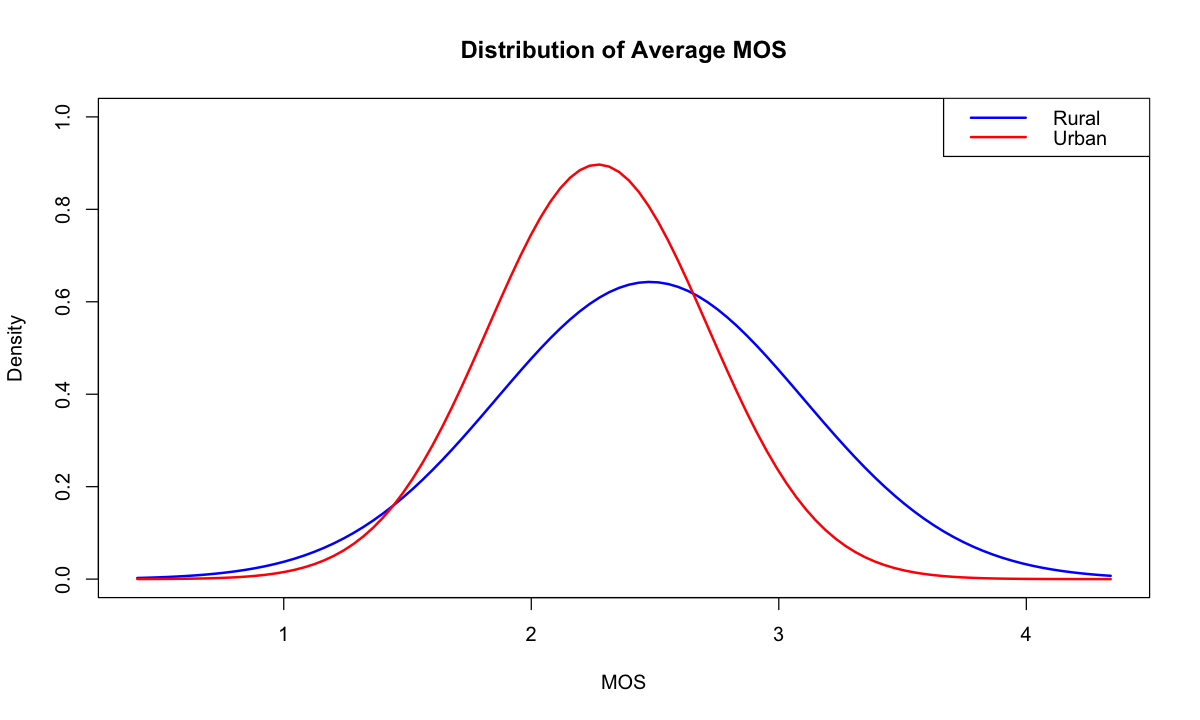

In [48]:
# Sample means and standard deviations for two distributions
mean_1 <- mean(ruralavgs)
sd_1 <- mean(ruralstdves)
mean_2 <- mean(urbanavgs)
sd_2 <- mean(urbanstdevs)

# Generate a sequence of x values that covers both distributions
x_values <- seq(min(mean_1, mean_2) - 3 * max(sd_1, sd_2), max(mean_1, mean_2) + 3 * max(sd_1, sd_2), length.out = 100)

# Compute the y values for both distributions
y_values_1 <- dnorm(x_values, mean = mean_1, sd = sd_1)
y_values_2 <- dnorm(x_values, mean = mean_2, sd = sd_2)
par(bg = "white") 
# Plot the first normal distribution
plot(x_values, y_values_1, type = "l", lwd = 2, col = "blue", 
     main = "Distributions of Average MOS", xlab = "MOS", ylab = "Density", ylim = c(0,1))

# Add the second normal distribution to the same plot
lines(x_values, y_values_2, col = "red", lwd = 2)

# Add a legend to distinguish the distributions
legend("topright", legend = c("Rural", "Urban"), 
       col = c("blue", "red"), lwd = 2)


# Visualise MOS distribution

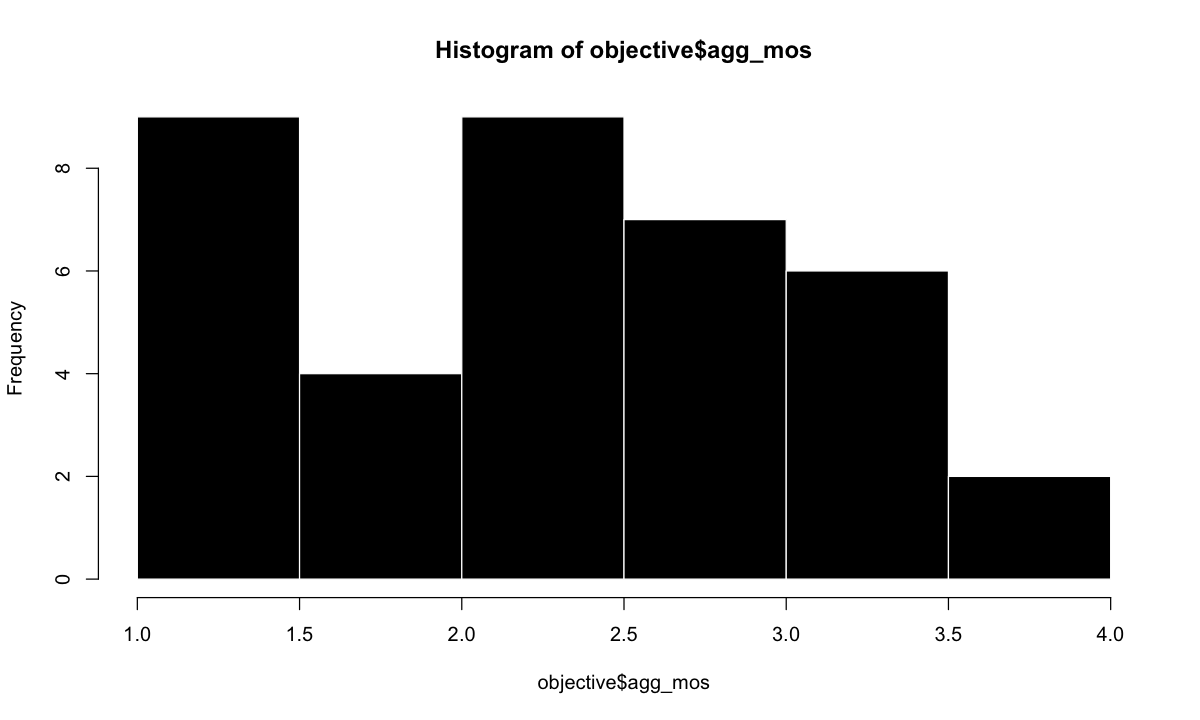

In [3]:
options(repr.plot.width = 10, repr.plot.height = 6)
#plot the target variable
par(bg = "white")  # set background color to white
hist(objective$agg_mos,
     col = "black",
     border = "white")

# BIG regression
### fit with all variables

In [50]:
fit <- lm(agg_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
    + avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google
    + distance + telstra_distance + urban + line_of_sight, data = objective)
summary(fit)


Call:
lm(formula = agg_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + 
    avg_ellen_jitter + avg_pl_ellen + avg_up_aadya + avg_down_aadya + 
    avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + 
    sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + 
    sd_pl_aadya + avg_down_google + avg_up_google + avg_rtt_google + 
    sd_down_google + sd_up_google + sd_rtt_google + distance + 
    telstra_distance + urban + line_of_sight, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98517 -0.28766  0.04301  0.23465  0.81743 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)       3.437917   8.425826   0.408    0.697
avg_up_ellen     -0.004429   0.049231  -0.090    0.931
avg_down_ellen    0.002789   0.059790   0.047    0.964
avg_rtt_ellen    -0.049850   0.166752  -0.299    0.775
avg_ellen_jitter -0.059594   0.138938  -0.429    0.68

In [51]:
cor_matrix <- cor(objective[, c("avg_up_ellen", "avg_down_ellen", "avg_rtt_ellen", 
                                "avg_ellen_jitter", "avg_pl_ellen", "avg_up_aadya", 
                                "avg_down_aadya", "avg_rtt_aadya", "avg_jitter_aadya", 
                                "avg_pl_aadya", "sd_up_ellen", "sd_down_ellen", 
                                "sd_rtt_ellen", "sd_jitter_ellen", "sd_pl_ellen", 
                                "sd_up_aadya", "sd_down_aadya", "sd_rtt_aadya", 
                                "sd_jitter_aadya", "sd_pl_aadya", "avg_down_google", 
                                "avg_up_google", "avg_rtt_google", "sd_down_google", 
                                "sd_up_google", "sd_rtt_google", "distance", 
                                "telstra_distance", "line_of_sight")], use = "complete.obs")

# View correlation matrix
cor_matrix

,avg_up_ellen,avg_down_ellen,avg_rtt_ellen,avg_ellen_jitter,avg_pl_ellen,avg_up_aadya,avg_down_aadya,avg_rtt_aadya,avg_jitter_aadya,avg_pl_aadya,...,sd_pl_aadya,avg_down_google,avg_up_google,avg_rtt_google,sd_down_google,sd_up_google,sd_rtt_google,distance,telstra_distance,line_of_sight
avg_up_ellen,1.00000000,0.03657220,-0.308469491,-0.32965725,0.169800548,0.60268898,0.20389659,-0.35586526,-0.25038841,-0.089608631,...,-0.132429662,0.062623866,0.26019793,0.170506554,0.08057222,0.276751473,-0.16913640,-0.09479815,-0.29443053,0.54191179
avg_down_ellen,0.03657220,1.00000000,-0.083756973,-0.49035976,-0.198655591,0.37071995,0.63511563,-0.14811594,-0.50802734,-0.151047189,...,-0.227410672,0.461210464,0.06760776,0.270388174,0.50722879,0.466945797,0.08273041,0.26151966,0.25647379,0.05955623
avg_rtt_ellen,-0.30846949,-0.08375697,1.000000000,0.60156865,-0.260778206,-0.16899929,-0.05358969,0.54197384,0.29875629,0.039254331,...,0.069706878,0.078592643,0.28519090,0.003881135,0.31195821,0.370034814,-0.34065489,0.26293079,0.35052982,0.21113251
avg_ellen_jitter,-0.32965725,-0.49035976,0.601568655,1.00000000,0.045103194,-0.16389477,-0.11570921,0.20531590,0.24689866,0.311844200,...,0.357516263,-0.077192642,0.11129471,-0.149891757,-0.02558558,0.081970626,-0.12944435,-0.06583197,0.08587397,0.13807572
avg_pl_ellen,0.16980055,-0.19865559,-0.260778206,0.04510319,1.000000000,0.10926139,-0.05282086,-0.39696551,-0.13506080,-0.068028527,...,-0.065222188,0.070124466,0.01427361,-0.071384361,-0.06636230,-0.048280198,-0.08626267,0.22559234,0.15384990,-0.10803018
avg_up_aadya,0.60268898,0.37071995,-0.168999285,-0.16389477,0.109261392,1.00000000,0.47075582,-0.40235195,-0.39448213,-0.102699215,...,-0.134473906,0.183069650,0.31114243,0.065874925,0.30250497,0.519569113,-0.14755032,0.02676769,-0.11036335,0.54868769
avg_down_aadya,0.20389659,0.63511563,-0.053589692,-0.11570921,-0.052820859,0.47075582,1.00000000,-0.33611232,-0.63241316,-0.202620149,...,-0.245055345,0.465686446,0.13084040,0.219763818,0.44639538,0.533269649,0.07720417,0.19562885,0.04953779,0.29789109
avg_rtt_aadya,-0.35586526,-0.14811594,0.541973836,0.20531590,-0.396965507,-0.40235195,-0.33611232,1.00000000,0.57407142,0.020276691,...,0.053160779,0.032307128,-0.10921669,0.157824897,0.18188000,-0.044805128,-0.13913202,0.15205414,0.33298397,-0.01456949
avg_jitter_aadya,-0.25038841,-0.50802734,0.298756287,0.24689866,-0.135060801,-0.39448213,-0.63241316,0.57407142,1.00000000,0.165918132,...,0.181464908,-0.214169476,-0.12299113,-0.118829474,-0.16786499,-0.218838757,-0.00830538,-0.06396707,0.04401904,-0.02879433
avg_pl_aadya,-0.08960863,-0.15104719,0.039254331,0.31184420,-0.068028527,-0.10269922,-0.20262015,0.02027669,0.16591813,1.000000000,...,0.963782597,0.032804115,-0.20576446,0.281655815,0.21571731,-0.006473326,-0.28139593,-0.07857573,-0.09778075,-0.08654927


# Log transformed

In [4]:
# List of columns to exclude from scaling
exclude_columns <- c("identifier", "e_audio_mos", "e_video_mos", "e_mos", "a_audio_mos", "a_video_mos", "a_mos", "agg_audio_mos", "agg_video_mos", "agg_mos")

objective$log_up_ellen <- log(objective$avg_up_ellen)
objective$log_up_aadya <- log(objective$avg_up_aadya)
objective$log_down_ellen <- log(objective$avg_down_ellen)
objective$log_down_aadya <- log(objective$avg_down_aadya)
objective$log_up_google <- log(objective$avg_up_google)
objective$log_down_google <- log(objective$avg_down_google)

objective_scaled <- objective
objective_scaled[, !names(objective) %in% exclude_columns] <- scale(objective[, !names(objective) %in% exclude_columns])

# Fit the model using the scaled dataframe
fit_logs <- lm(agg_mos ~ log_up_ellen + log_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + log_up_aadya + log_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
    + log_down_google + log_up_google + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google
    + distance + telstra_distance + urban + line_of_sight, 
    data = objective_scaled)


# LASSO

In [5]:
cv_alpha <- function(x, y, nfolds = 5) {
  alphas <- seq(0, 1, by = 0.1)
  cv_errors <- numeric(length(alphas))
  
  for (i in seq_along(alphas)) {
    fit <- cv.glmnet(x, y, alpha = alphas[i], nfolds = nfolds)
    cv_errors[i] <- min(fit$cvm)
  }
  
  best_alpha <- alphas[which.min(cv_errors)]
  return(best_alpha)}
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-8



Best alpha: 0.7 
[1] 0.1155684


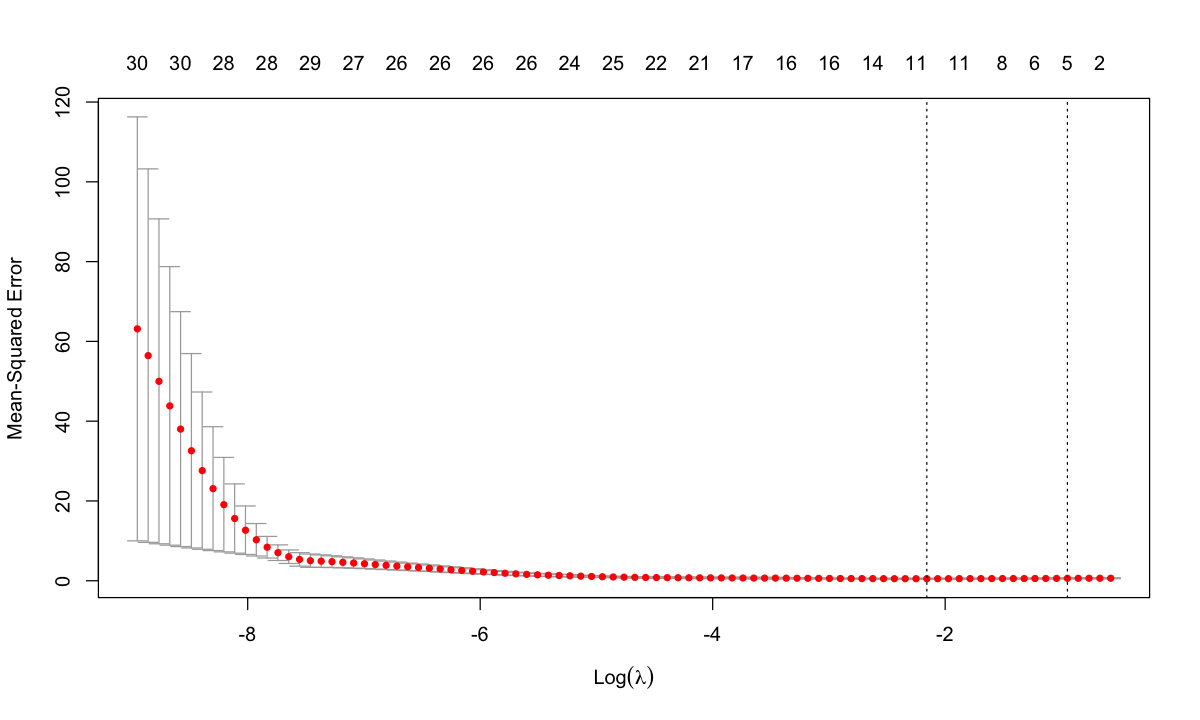

In [12]:
library(glmnet)

# Prepare the data
x <- model.matrix(agg_mos ~ log_up_ellen + log_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + log_up_aadya + log_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
    + log_down_google + log_up_google + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google
    + distance + telstra_distance + urban + line_of_sight, 
    data = objective_scaled)

y <- objective_scaled$agg_mos

# Find the best alpha
best_alpha <- cv_alpha(x, y)
cat("Best alpha:", best_alpha, "\n")

# Fit the model with the best alpha
cv_model_best <- cv.glmnet(x, y, alpha = best_alpha)

# Plot the cross-validation curve
par(bg= "white")
plot(cv_model_best)

# Get the best lambda
best_lambda <- cv_model_best$lambda.min
print(best_lambda)

# Fit the final model with the best alpha and lambda
final_model_best <- glmnet(x, y, alpha = best_alpha, lambda = best_lambda)
selected_vars <- rownames(coef(final_model_best))[-1][coef(final_model_best)[-1, 1] != 0]

# Create a formula for the selected variables
formula <- as.formula(paste("agg_mos ~", paste(selected_vars, collapse = " + ")))

### refit lasso model
necessary to get the pvalues output


Call:
glm(formula = formula, data = objective_scaled)

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.31644    0.08110  28.565  < 2e-16 ***
log_down_ellen    0.27554    0.19331   1.425  0.16642    
avg_rtt_ellen    -0.21007    0.16689  -1.259  0.21977    
avg_ellen_jitter -0.08978    0.16424  -0.547  0.58948    
log_up_aadya      0.26299    0.15777   1.667  0.10801    
log_down_aadya    0.13636    0.17410   0.783  0.44084    
avg_jitter_aadya  0.06555    0.13734   0.477  0.63729    
sd_up_ellen      -0.18257    0.08964  -2.037  0.05240 .  
sd_up_aadya      -0.34159    0.10591  -3.225  0.00349 ** 
sd_rtt_aadya     -0.04615    0.11153  -0.414  0.68256    
log_up_google    -0.10144    0.09946  -1.020  0.31757    
sd_rtt_google    -0.30434    0.10476  -2.905  0.00757 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.2433274)

    Null deviance: 21.8750  on 36  degrees

[1] 0.1644104

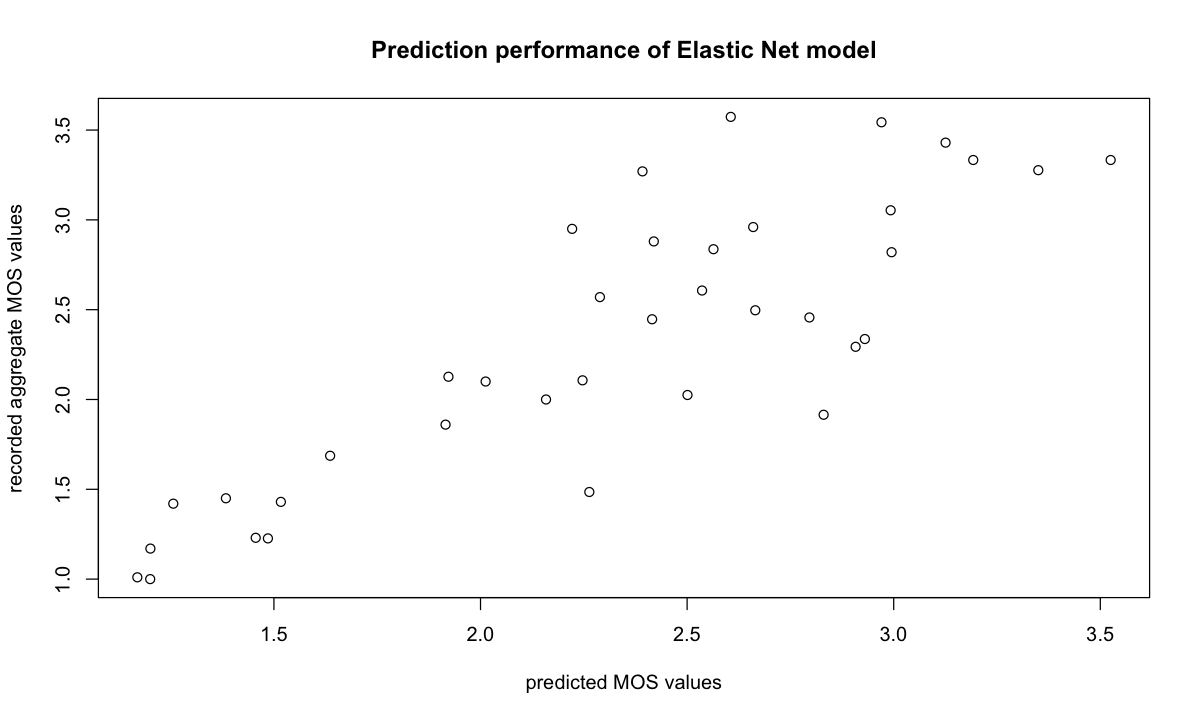

In [13]:
lasso_model <- glm(formula, data = objective_scaled)
summary(lasso_model)
par(bg= "white")
options(repr.plot.width = 10, repr.plot.height = 6)
plot(predict(lasso_model, objective_scaled), objective_scaled$agg_mos, main="Prediction performance of Elastic Net model", ylab= "recorded aggregate MOS values", xlab="predicted MOS values")
#plot(lasso_model$fitted.values, resid(lasso_model), 
    # main = "Residuals vs Predicted Mean Opinon Score (MOS)", 
    # xlab = "Predicted MOS values", 
    # ylab = "Residuals")
abline(h = 0, col = "red")
predictions <- predict(lasso_model, objective_scaled)
mean((objective_scaled$agg_mos - predictions)^2)

# not sure why this stuff

In [14]:
# Assuming final_model_best is already fitted
# Extract coefficients
lasso_coefficients <- coef(final_model_best)

# Display coefficients
print("Lasso Coefficients:")
print(lasso_coefficients)

# Convert coefficients to a data frame for easier handling
coef_summary <- as.data.frame(as.matrix(lasso_coefficients))
coef_summary$Variable <- rownames(coef_summary)
colnames(coef_summary) <- c("Estimate", "Variable")
coef_summary <- coef_summary[coef_summary$Estimate != 0, ]  # Keep only non-zero coefficients

# Display the coefficients
print(coef_summary)

# To get p-values, we need to fit a standard logistic regression model using the selected variables
selected_vars <- rownames(coef(final_model_best))[-1][coef(final_model_best)[-1, 1] != 0]
formula <- as.formula(paste("agg_mos ~", paste(selected_vars, collapse = " + ")))

# Fit the logistic regression model
logistic_model <- glm(formula, data = objective_scaled, family = "binomial")

# Get summary to extract p-values
summary_output <- summary(logistic_model)

# Extract coefficients and p-values
coef_summary_logistic <- data.frame(
  Estimate = summary_output$coefficients[, "Estimate"],
  `Std. Error` = summary_output$coefficients[, "Std. Error"],
  `z value` = summary_output$coefficients[, "z value"],
  `Pr(>|z|)` = summary_output$coefficients[, "Pr(>|z|)"]
)

# Display the results
print("Logistic Model Coefficients and P-values:")
print(coef_summary_logistic)


[1] "Lasso Coefficients:"
32 x 1 sparse Matrix of class "dgCMatrix"
                          s0
(Intercept)       2.31644144
(Intercept)       .         
log_up_ellen      .         
log_down_ellen    0.18351241
avg_rtt_ellen    -0.14009109
avg_ellen_jitter -0.09367020
avg_pl_ellen      .         
log_up_aadya      0.12193998
log_down_aadya    0.07379587
avg_rtt_aadya     .         
avg_jitter_aadya -0.01237779
avg_pl_aadya      .         
sd_up_ellen      -0.06362922
sd_down_ellen     .         
sd_rtt_ellen      .         
sd_jitter_ellen   .         
sd_pl_ellen       .         
sd_up_aadya      -0.15883264
sd_down_aadya     .         
sd_rtt_aadya     -0.01106839
sd_jitter_aadya   .         
sd_pl_aadya       .         
log_down_google   .         
log_up_google    -0.02782340
avg_rtt_google    .         
sd_down_google    .         
sd_up_google      .         
sd_rtt_google    -0.14753245
distance          .         
telstra_distance  .         
urban             .         
line

ERROR: Error in eval(family$initialize): y values must be 0 <= y <= 1


[1] "Mean Squared Error: 0.399924988520247"


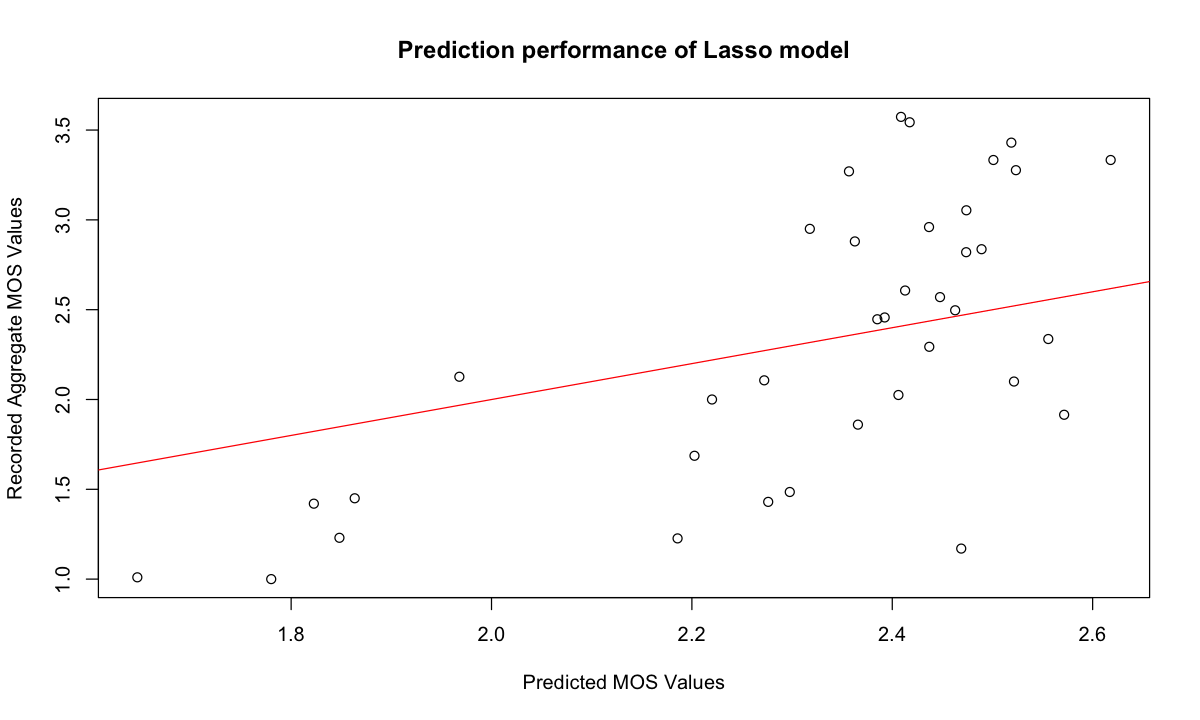

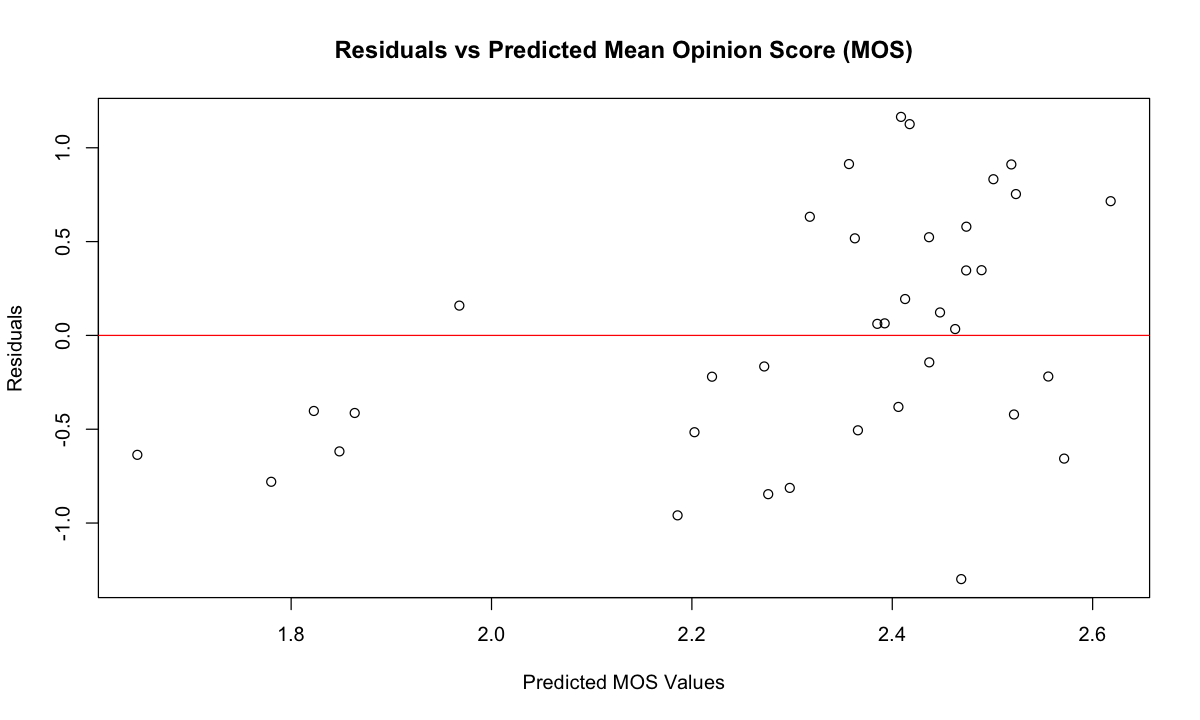

In [61]:
# Use the final Lasso model for predictions
predictions <- predict(final_model_best, newx = x)  # Use the model fitted with glmnet

# Calculate Mean Squared Error for the predictions
mse <- mean((objective$agg_mos - predictions)^2)
print(paste("Mean Squared Error:", mse))
par(bg = "white")

# Plotting the prediction performance
options(repr.plot.width = 10, repr.plot.height = 6)
plot(predictions, objective$agg_mos, main="Prediction performance of Lasso model", 
     ylab= "Recorded Aggregate MOS Values", xlab="Predicted MOS Values")
abline(0, 1, col = "red")  # Reference line for perfect predictions

# Plot Residuals vs. Predicted values
residuals <- objective$agg_mos - predictions
plot(predictions, residuals, 
     main = "Residuals vs Predicted Mean Opinion Score (MOS)", 
     xlab = "Predicted MOS Values", 
     ylab = "Residuals")
abline(h = 0, col = "red")


# Penalised with logs


In [17]:
fit_aic_logs <- step(fit_logs)
summary(fit_aic_logs)
# par(bg = "white")
# options(repr.plot.width = 10, repr.plot.height = 6)
# plot(predict(fit_aic_logs, objective), objective$agg_mos, 
# main = "Prediction performance of AIC stepfit model", 
# xlab = "predicted MOS values", ylab = "recorded aggregate MOS values")
# predictions <- predict(fit_aic_logs, objective)
# mean((objective$agg_mos - predictions)^2)

Start:  AIC=-39.66
agg_mos ~ log_up_ellen + log_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + log_up_aadya + log_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    log_down_google + log_up_google + avg_rtt_google + sd_down_google + 
    sd_up_google + sd_rtt_google + distance + telstra_distance + 
    urban + line_of_sight

                   Df Sum of Sq    RSS     AIC
- avg_ellen_jitter  1   0.00011 2.3712 -41.658
- sd_jitter_ellen   1   0.00043 2.3715 -41.653
- distance          1   0.00460 2.3757 -41.588
- sd_up_google      1   0.00673 2.3778 -41.555
- line_of_sight     1   0.00716 2.3783 -41.548
- sd_jitter_aadya   1   0.00860 2.3797 -41.526
- avg_rtt_ellen     1   0.00892 2.3800 -41.521
- sd_rtt_ellen      1   0.01417 2.3853 -41.439
- sd_down_aadya     1   0.02506 2.3962 -41.


Call:
lm(formula = agg_mos ~ log_up_ellen + log_down_ellen + avg_pl_ellen + 
    log_up_aadya + log_down_aadya + avg_rtt_aadya + avg_jitter_aadya + 
    sd_pl_ellen + sd_up_aadya + sd_rtt_aadya + sd_pl_aadya + 
    log_down_google + log_up_google + avg_rtt_google + sd_down_google + 
    sd_rtt_google + telstra_distance + urban, data = objective_scaled)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67867 -0.13882  0.01481  0.16166  0.60683 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.31644    0.06351  36.471  < 2e-16 ***
log_up_ellen      0.29387    0.14005   2.098 0.050252 .  
log_down_ellen    0.42586    0.18217   2.338 0.031151 *  
avg_pl_ellen      0.36408    0.12395   2.937 0.008803 ** 
log_up_aadya      0.65353    0.15782   4.141 0.000614 ***
log_down_aadya    0.30687    0.18710   1.640 0.118326    
avg_rtt_aadya     1.07109    0.21692   4.938 0.000106 ***
avg_jitter_aadya -0.19765    0.12741  -1.551 0.138252    
sd_

Start:  AIC=10.28
agg_mos ~ log_up_ellen + log_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + log_up_aadya + log_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    log_down_google + log_up_google + avg_rtt_google + sd_down_google + 
    sd_up_google + sd_rtt_google + distance + telstra_distance + 
    urban + line_of_sight

                   Df Sum of Sq    RSS     AIC
- avg_ellen_jitter  1   0.00011 2.3712  6.6696
- sd_jitter_ellen   1   0.00043 2.3715  6.6745
- distance          1   0.00460 2.3757  6.7395
- sd_up_google      1   0.00673 2.3778  6.7727
- line_of_sight     1   0.00716 2.3783  6.7794
- sd_jitter_aadya   1   0.00860 2.3797  6.8018
- avg_rtt_ellen     1   0.00892 2.3800  6.8068
- sd_rtt_ellen      1   0.01417 2.3853  6.8884
- sd_down_aadya     1   0.02506 2.3962  7.05


Call:
lm(formula = agg_mos ~ log_down_ellen + avg_pl_ellen + log_up_aadya + 
    avg_rtt_aadya + sd_pl_ellen + sd_up_aadya + sd_rtt_aadya + 
    sd_pl_aadya + log_down_google + log_up_google + avg_rtt_google + 
    sd_down_google + sd_rtt_google + urban, data = objective_scaled)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9421 -0.1923 -0.0001  0.1508  0.6111 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.31644    0.06785  34.142  < 2e-16 ***
log_down_ellen   0.67644    0.14782   4.576 0.000148 ***
avg_pl_ellen     0.28030    0.11309   2.479 0.021342 *  
log_up_aadya     0.77518    0.14509   5.343 2.31e-05 ***
avg_rtt_aadya    0.73835    0.18209   4.055 0.000528 ***
sd_pl_ellen     -0.23393    0.08890  -2.631 0.015250 *  
sd_up_aadya     -0.39688    0.09428  -4.210 0.000362 ***
sd_rtt_aadya    -0.39697    0.12897  -3.078 0.005501 ** 
sd_pl_aadya      0.21810    0.12359   1.765 0.091490 .  
log_down_google  0.32564    0.12825   2.

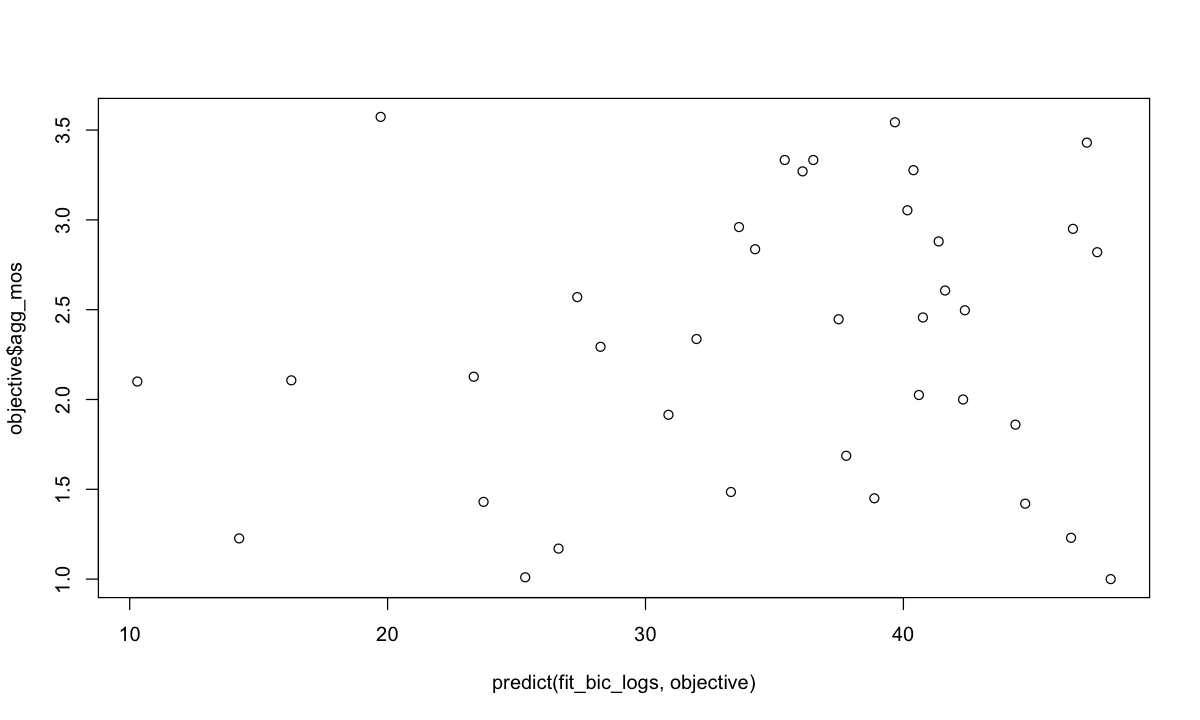

In [16]:
fit_bic_logs <- step(fit_logs, k = log(length(objective$agg_mos)))
summary(fit_bic_logs)
par(bg = "white")
options(repr.plot.width = 10, repr.plot.height = 6)
plot(predict(fit_bic_logs, objective), objective$agg_mos)

## PCA

In [14]:
pca_result <- prcomp(objective[, c("avg_up_ellen", "avg_down_ellen", "avg_rtt_ellen", 
                                   "avg_ellen_jitter", "avg_pl_ellen", "avg_up_aadya", 
                                   "avg_down_aadya", "avg_rtt_aadya", "avg_jitter_aadya", 
                                   "avg_pl_aadya", "sd_up_ellen", "sd_down_ellen", 
                                   "sd_rtt_ellen", "sd_jitter_ellen", "sd_pl_ellen", 
                                   "sd_up_aadya", "sd_down_aadya", "sd_rtt_aadya", 
                                   "sd_jitter_aadya", "sd_pl_aadya", "avg_down_google", 
                                   "avg_up_google", "avg_rtt_google", "sd_down_google", 
                                   "sd_up_google", "sd_rtt_google", "distance", 
                                   "telstra_distance", "line_of_sight")], 
                    scale. = TRUE)  # Standardize the data before applying PCA

# View the PCA summary to see the proportion of variance explained by each component
summary(pca_result)

# Use the first few principal components that explain the most variance
pca_components <- pca_result$x[, 1:5]  # Replace 1:5 with the number of components you want to keep

# Fit a new model using the principal components
pca_model <- lm(agg_mos ~ pca_components, data = objective)

# View the summary of the new model
summary(pca_model)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.4488 2.1291 1.68255 1.60240 1.45923 1.42258 1.2375
Proportion of Variance 0.2068 0.1563 0.09762 0.08854 0.07343 0.06978 0.0528
Cumulative Proportion  0.2068 0.3631 0.46071 0.54925 0.62268 0.69246 0.7453
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     1.08391 1.05494 0.92210 0.89045 0.85768 0.6960 0.66979
Proportion of Variance 0.04051 0.03838 0.02932 0.02734 0.02537 0.0167 0.01547
Cumulative Proportion  0.78578 0.82416 0.85348 0.88082 0.90618 0.9229 0.93836
                         PC15    PC16    PC17    PC18    PC19   PC20    PC21
Standard deviation     0.6141 0.57616 0.46433 0.42646 0.40759 0.3404 0.32668
Proportion of Variance 0.0130 0.01145 0.00743 0.00627 0.00573 0.0040 0.00368
Cumulative Proportion  0.9514 0.96281 0.97024 0.97651 0.98224 0.9862 0.98992
                         PC22   PC23    PC24    PC


Call:
lm(formula = agg_mos ~ pca_components, data = objective)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4405 -0.3681 -0.0262  0.5092  1.0982 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.31644    0.11158  20.760  < 2e-16 ***
pca_componentsPC1  0.10155    0.04620   2.198  0.03552 *  
pca_componentsPC2 -0.14874    0.05313  -2.799  0.00873 ** 
pca_componentsPC3 -0.05633    0.06723  -0.838  0.40850    
pca_componentsPC4  0.10024    0.07060   1.420  0.16563    
pca_componentsPC5 -0.08116    0.07752  -1.047  0.30320    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6787 on 31 degrees of freedom
Multiple R-squared:  0.3471,	Adjusted R-squared:  0.2418 
F-statistic: 3.297 on 5 and 31 DF,  p-value: 0.01677


### visualise against certain significant variables

In [15]:
library(ggplot2)
ggplot2(MOS_test, aes(x = avg_up_ellen, y = agg_MOS)) +
  geom_point(color = "blue") +
  labs(title = "MOS score and ellen avg upload speed", x = "avg_up_ellen", y = "agg_MOS") +
  theme_minimal()

ERROR: Error in ggplot2(MOS_test, aes(x = avg_up_ellen, y = agg_MOS)): could not find function "ggplot2"


### perform and plot the predictions

[1] 0.1315896

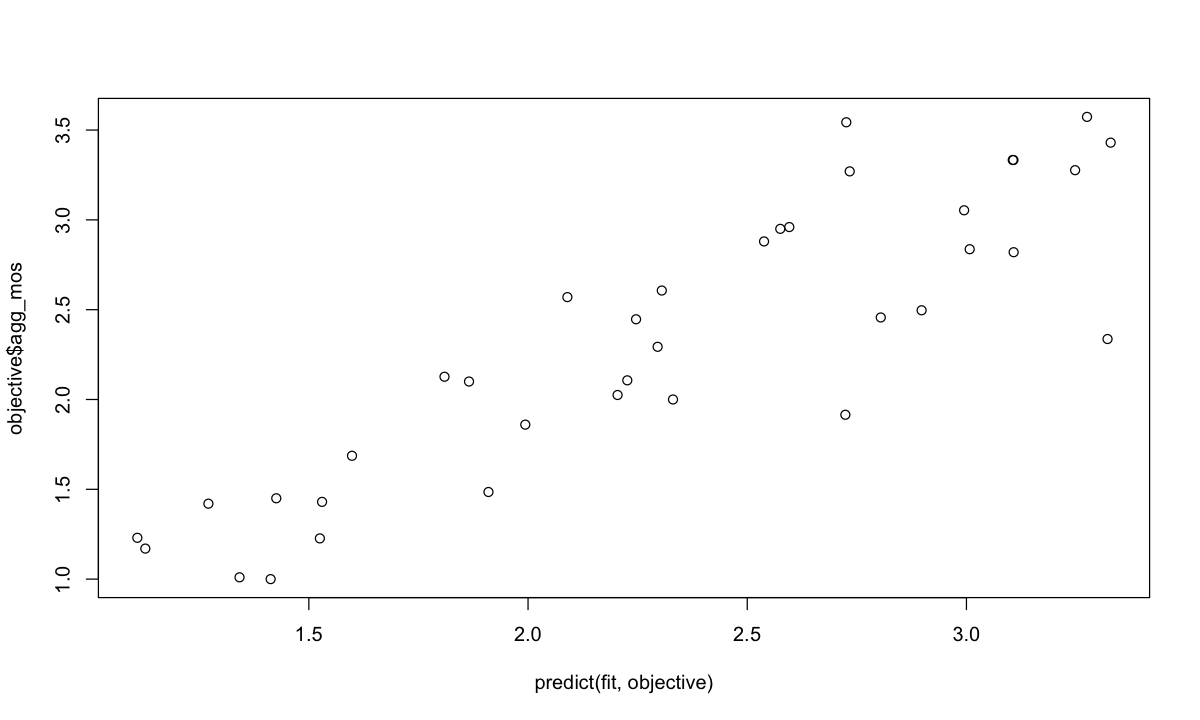

In [16]:
par(bg = "white")
predictions <- predict(fit, objective)
plot(predict(fit, objective), objective$agg_mos)
#calculate mean squared error
mean((predictions - objective$agg_mos)^2)

# Penalised regression 
### AIC

Start:  AIC=-39.66
agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + 
    avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + log(avg_down_aadya) + 
    avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + 
    sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + 
    sd_pl_aadya + log(avg_down_google) + log(avg_up_google) + 
    avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google + 
    distance + telstra_distance + urban + line_of_sight

                       Df Sum of Sq    RSS     AIC
- avg_ellen_jitter      1   0.00011 2.3712 -41.658
- sd_jitter_ellen       1   0.00043 2.3715 -41.653
- distance              1   0.00460 2.3757 -41.588
- sd_up_google          1   0.00673 2.3778 -41.555
- line_of_sight         1   0.00716 2.3783 -41.548
- sd_jitter_aadya       1   0.00860 2.3797 -41.526
- avg_rtt_ellen         1   0.00892 2.3800 -41.521
- sd_rtt_ellen          1   


Call:
lm(formula = agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + 
    avg_pl_ellen + log(avg_up_aadya) + log(avg_down_aadya) + 
    avg_rtt_aadya + avg_jitter_aadya + sd_pl_ellen + sd_up_aadya + 
    sd_rtt_aadya + sd_pl_aadya + log(avg_down_google) + log(avg_up_google) + 
    avg_rtt_google + sd_down_google + sd_rtt_google + telstra_distance + 
    urban, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67867 -0.13882  0.01481  0.16166  0.60683 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -8.486471   1.830982  -4.635 0.000206 ***
log(avg_up_ellen)     0.273821   0.130493   2.098 0.050252 .  
log(avg_down_ellen)   0.648314   0.277330   2.338 0.031151 *  
avg_pl_ellen          0.110900   0.037754   2.937 0.008803 ** 
log(avg_up_aadya)     0.603133   0.145651   4.141 0.000614 ***
log(avg_down_aadya)   0.423520   0.258216   1.640 0.118326    
avg_rtt_aadya         0.198185   0.040136   4.938 0.0001

[1] 0.07261317

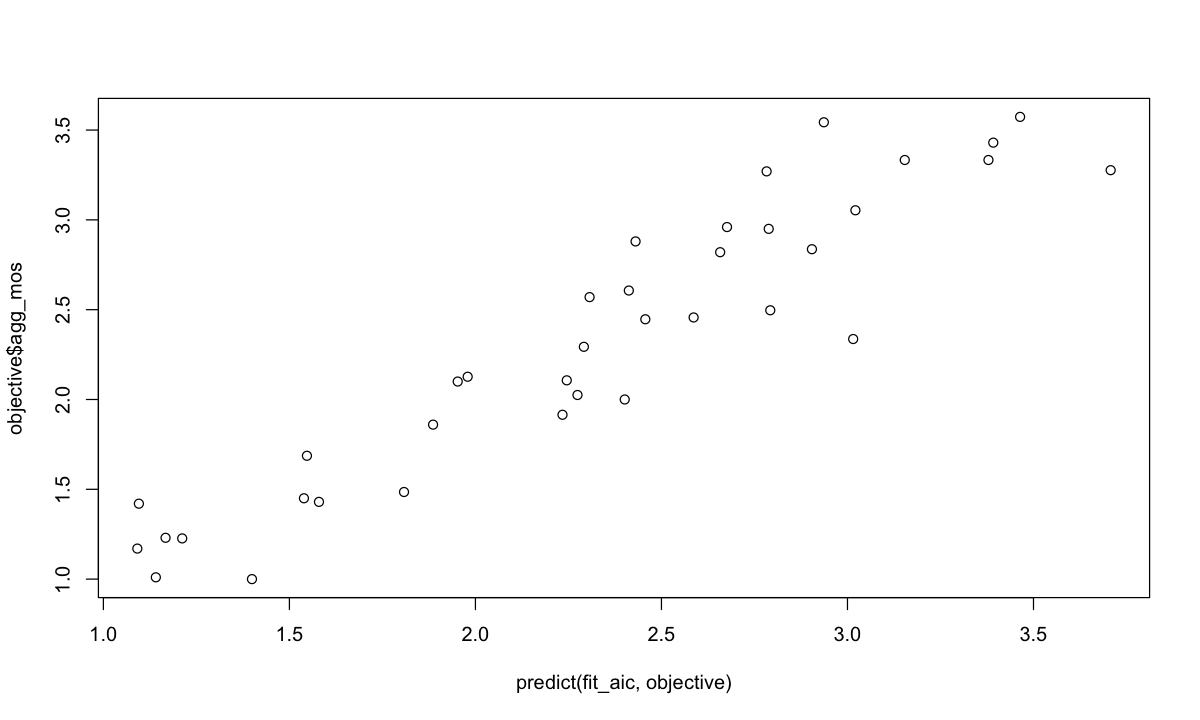

In [17]:
fit_aic <- step(fit_logs) #stepwise regression to optimse a linear model
summary(fit_aic)
par(bg = "white")
options(repr.plot.width = 10, repr.plot.height = 6)
plot(predict(fit_aic, objective), objective$agg_mos)
mean((predict(fit_aic, objective) - objective$agg_mos)^2)

### BIC

Start:  AIC=10.28
agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + 
    avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + log(avg_down_aadya) + 
    avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + 
    sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + 
    sd_pl_aadya + log(avg_down_google) + log(avg_up_google) + 
    avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google + 
    distance + telstra_distance + urban + line_of_sight

                       Df Sum of Sq    RSS     AIC
- avg_ellen_jitter      1   0.00011 2.3712  6.6696
- sd_jitter_ellen       1   0.00043 2.3715  6.6745
- distance              1   0.00460 2.3757  6.7395
- sd_up_google          1   0.00673 2.3778  6.7727
- line_of_sight         1   0.00716 2.3783  6.7794
- sd_jitter_aadya       1   0.00860 2.3797  6.8018
- avg_rtt_ellen         1   0.00892 2.3800  6.8068
- sd_rtt_ellen          1   0


Call:
lm(formula = agg_mos ~ log(avg_down_ellen) + avg_pl_ellen + log(avg_up_aadya) + 
    avg_rtt_aadya + sd_pl_ellen + sd_up_aadya + sd_rtt_aadya + 
    sd_pl_aadya + log(avg_down_google) + log(avg_up_google) + 
    avg_rtt_google + sd_down_google + sd_rtt_google + urban, 
    data = objective)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9421 -0.1923 -0.0001  0.1508  0.6111 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -6.315874   1.608072  -3.928 0.000719 ***
log(avg_down_ellen)   1.029791   0.225031   4.576 0.000148 ***
avg_pl_ellen          0.085381   0.034448   2.479 0.021342 *  
log(avg_up_aadya)     0.715395   0.133897   5.343 2.31e-05 ***
avg_rtt_aadya         0.136618   0.033692   4.055 0.000528 ***
sd_pl_ellen          -0.140018   0.053214  -2.631 0.015250 *  
sd_up_aadya          -0.056135   0.013335  -4.210 0.000362 ***
sd_rtt_aadya         -0.146258   0.047518  -3.078 0.005501 ** 
sd_pl_aadya           0.1

[1] 0.1012712

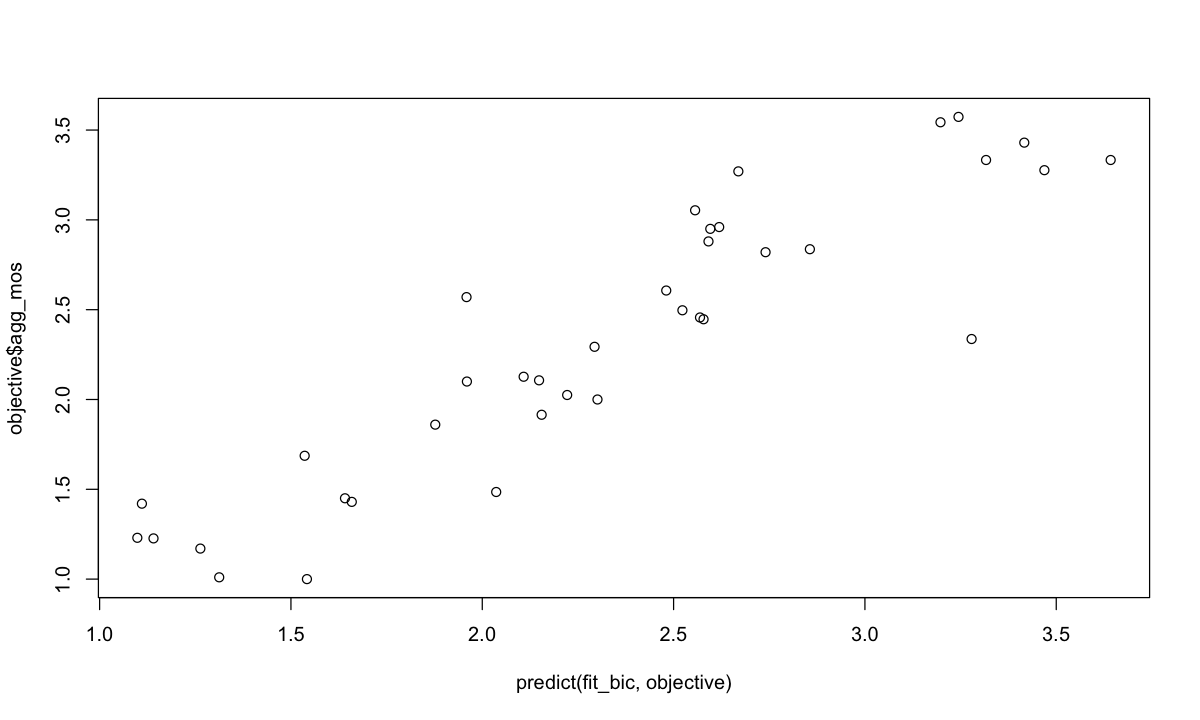

In [18]:
fit_bic <- step(fit_logs, k = log(length(objective$agg_mos)))
summary(fit_bic)
par(bg = "white")
options(repr.plot.width = 10, repr.plot.height = 6)
plot(predict(fit_bic, objective), objective$agg_mos)
mean((predict(fit_bic, objective) - objective$agg_mos)^2)

## one-sided regressions

### Ellen


Call:
lm(formula = e_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + 
    avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + 
    log(avg_down_aadya) + avg_rtt_aadya + avg_jitter_aadya + 
    avg_pl_aadya + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + 
    sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + sd_down_aadya + 
    sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + log(avg_down_google) + 
    log(avg_up_google) + avg_rtt_google + sd_down_google + sd_up_google + 
    sd_rtt_google + distance + telstra_distance + urban + line_of_sight, 
    data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59391 -0.08691  0.00041  0.09634  0.53789 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)           4.109335   8.054579   0.510    0.628
log(avg_up_ellen)     0.299174   0.364487   0.821    0.443
log(avg_down_ellen)  -0.066548   1.211026  -0.055    0.958
avg_rtt_ellen        -0.116763   0.110583  -1.056    0.332


[1] 0.04251933

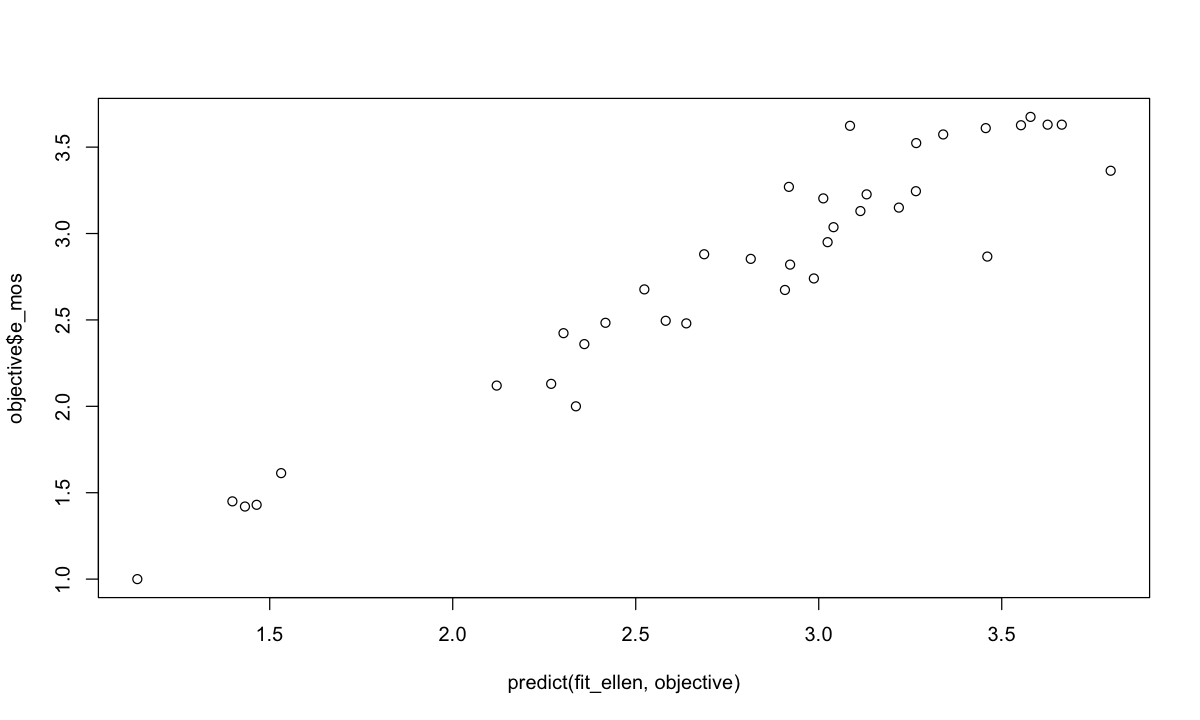

In [19]:
fit_ellen <- lm(e_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + log(avg_up_aadya) + log(avg_down_aadya) + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
    + log(avg_down_google) + log(avg_up_google) + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google
    + distance + telstra_distance + urban + line_of_sight, data = objective)
summary(fit_ellen)
par(bg = "white")
predictions <- predict(fit_ellen, objective)
plot(predict(fit_ellen, objective), objective$e_mos)
#calculate mean squared error
mean((predictions - objective$e_mos)^2)

Start:  AIC=-54.84
e_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + 
    avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + log(avg_down_aadya) + 
    avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + 
    sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + 
    sd_pl_aadya + log(avg_down_google) + log(avg_up_google) + 
    avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google + 
    distance + telstra_distance + urban + line_of_sight

                       Df Sum of Sq    RSS     AIC
- urban                 1   0.00065 1.5739 -56.823
- log(avg_down_ellen)   1   0.00079 1.5740 -56.820
- log(avg_up_aadya)     1   0.00594 1.5792 -56.699
- avg_ellen_jitter      1   0.01298 1.5862 -56.535
- avg_rtt_google        1   0.03334 1.6066 -56.062
- sd_down_ellen         1   0.03624 1.6095 -55.996
- sd_jitter_ellen       1   0.07441 1.6476 -55.129
- log(avg_up_google)    1   0.


Call:
lm(formula = e_mos ~ log(avg_up_ellen) + avg_rtt_ellen + avg_pl_ellen + 
    log(avg_down_aadya) + avg_rtt_aadya + avg_jitter_aadya + 
    avg_pl_aadya + sd_up_ellen + sd_rtt_ellen + sd_jitter_ellen + 
    sd_pl_ellen + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + 
    sd_jitter_aadya + sd_pl_aadya + log(avg_down_google) + log(avg_up_google) + 
    sd_down_google + sd_up_google + sd_rtt_google + distance + 
    telstra_distance + line_of_sight, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57484 -0.04939  0.00285  0.09838  0.45623 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)           3.09958    1.95591   1.585  0.13901   
log(avg_up_ellen)     0.33590    0.18319   1.834  0.09162 . 
avg_rtt_ellen        -0.10766    0.03930  -2.740  0.01794 * 
avg_pl_ellen         -0.11488    0.04778  -2.404  0.03325 * 
log(avg_down_aadya)   0.32121    0.26087   1.231  0.24180   
avg_rtt_aadya         0.08676    0.05345 

[1] 0.04602526

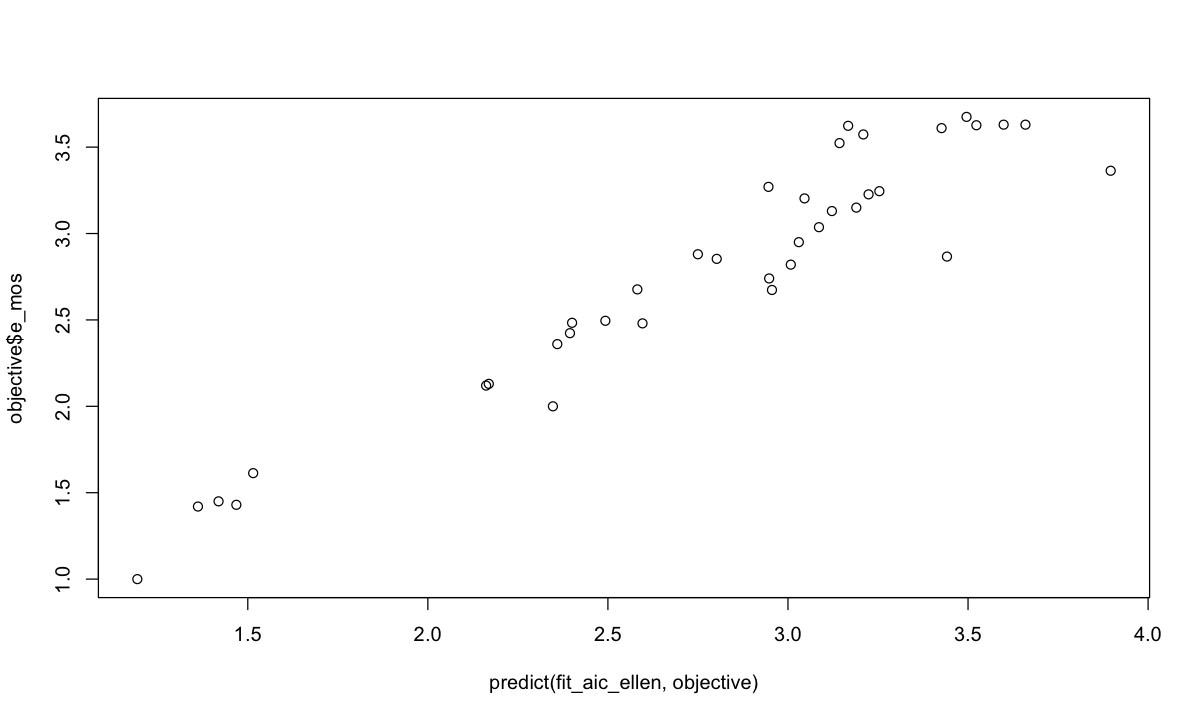

In [20]:
fit_aic_ellen <- step(fit_ellen) #stepwise regression to optimse a linear model
summary(fit_aic_ellen)
par(bg = "white")
plot(predict(fit_aic_ellen, objective), objective$e_mos)
mean((predict(fit_aic_ellen, objective) - objective$e_mos)^2)

Start:  AIC=-4.9
e_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + 
    avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + log(avg_down_aadya) + 
    avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + 
    sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + 
    sd_pl_aadya + log(avg_down_google) + log(avg_up_google) + 
    avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google + 
    distance + telstra_distance + urban + line_of_sight

                       Df Sum of Sq    RSS     AIC
- urban                 1   0.00065 1.5739 -8.4957
- log(avg_down_ellen)   1   0.00079 1.5740 -8.4923
- log(avg_up_aadya)     1   0.00594 1.5792 -8.3716
- avg_ellen_jitter      1   0.01298 1.5862 -8.2070
- avg_rtt_google        1   0.03334 1.6066 -7.7349
- sd_down_ellen         1   0.03624 1.6095 -7.6683
- sd_jitter_ellen       1   0.07441 1.6476 -6.8011
- log(avg_up_google)    1   0.08


Call:
lm(formula = e_mos ~ log(avg_up_ellen) + avg_rtt_ellen + avg_pl_ellen + 
    log(avg_down_aadya) + sd_rtt_aadya + log(avg_up_google) + 
    sd_rtt_google + telstra_distance + line_of_sight, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48196 -0.20037 -0.02589  0.16338  0.69308 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.754719   0.735640   5.104  2.3e-05 ***
log(avg_up_ellen)    0.250148   0.085158   2.937 0.006694 ** 
avg_rtt_ellen       -0.056988   0.016293  -3.498 0.001643 ** 
avg_pl_ellen        -0.085014   0.018739  -4.537 0.000106 ***
log(avg_down_aadya)  0.265063   0.096440   2.748 0.010542 *  
sd_rtt_aadya        -0.082350   0.023951  -3.438 0.001914 ** 
log(avg_up_google)  -0.207172   0.108720  -1.906 0.067407 .  
sd_rtt_google       -0.031206   0.006954  -4.487 0.000121 ***
telstra_distance     0.219326   0.110354   1.987 0.057099 .  
line_of_sight       -0.308769   0.138718  -2.2

[1] 0.0772238

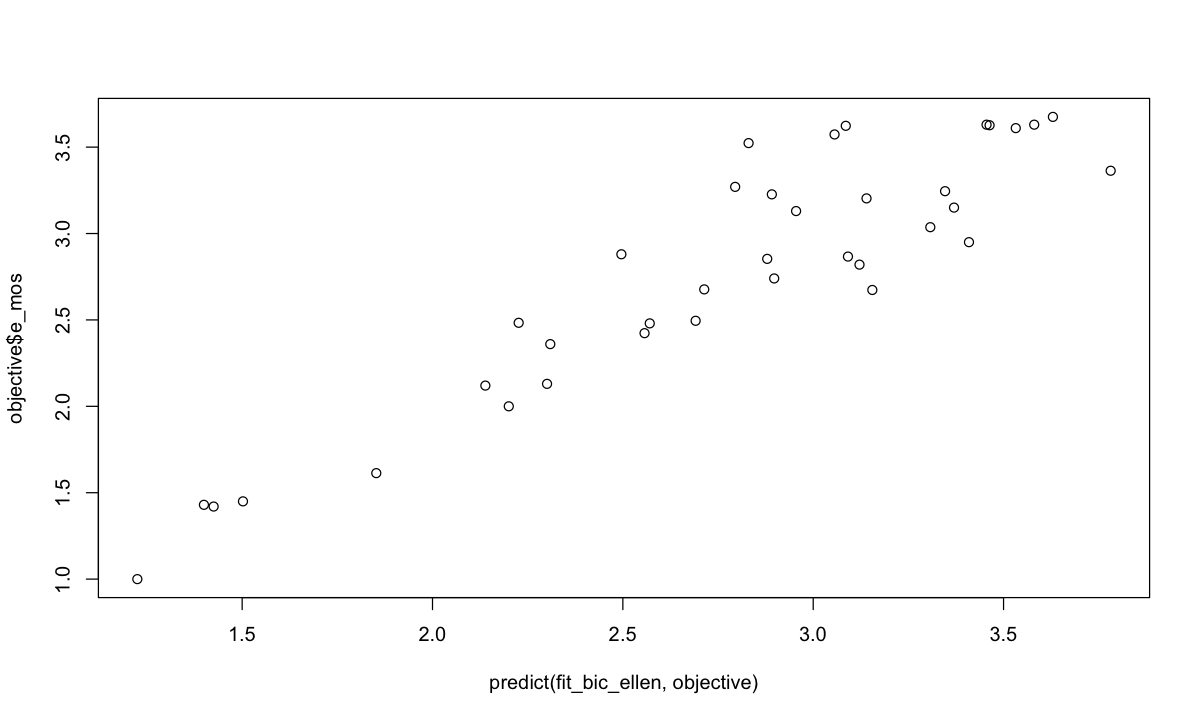

In [21]:
fit_bic_ellen <- step(fit_ellen, k = log(length(objective$e_mos)))
summary(fit_bic_ellen)
par(bg = "white")
plot(predict(fit_bic_ellen, objective), objective$e_mos)
mean((predict(fit_bic_ellen, objective) - objective$e_mos)^2)

### Aadya


Call:
lm(formula = a_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + 
    avg_ellen_jitter + avg_pl_ellen + avg_up_aadya + avg_down_aadya + 
    avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + 
    sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + 
    sd_pl_aadya + avg_down_google + avg_up_google + avg_rtt_google + 
    sd_down_google + sd_up_google + sd_rtt_google + distance + 
    telstra_distance + urban + line_of_sight, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09407 -0.30017 -0.00481  0.33929  0.73107 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)       5.086e+00  1.005e+01   0.506    0.631
avg_up_ellen     -1.749e-02  5.874e-02  -0.298    0.776
avg_down_ellen   -8.536e-03  7.134e-02  -0.120    0.909
avg_rtt_ellen    -3.910e-02  1.990e-01  -0.197    0.851
avg_ellen_jitter -6.276e-02  1.658e-01  -0.379    

[1] 0.1873636

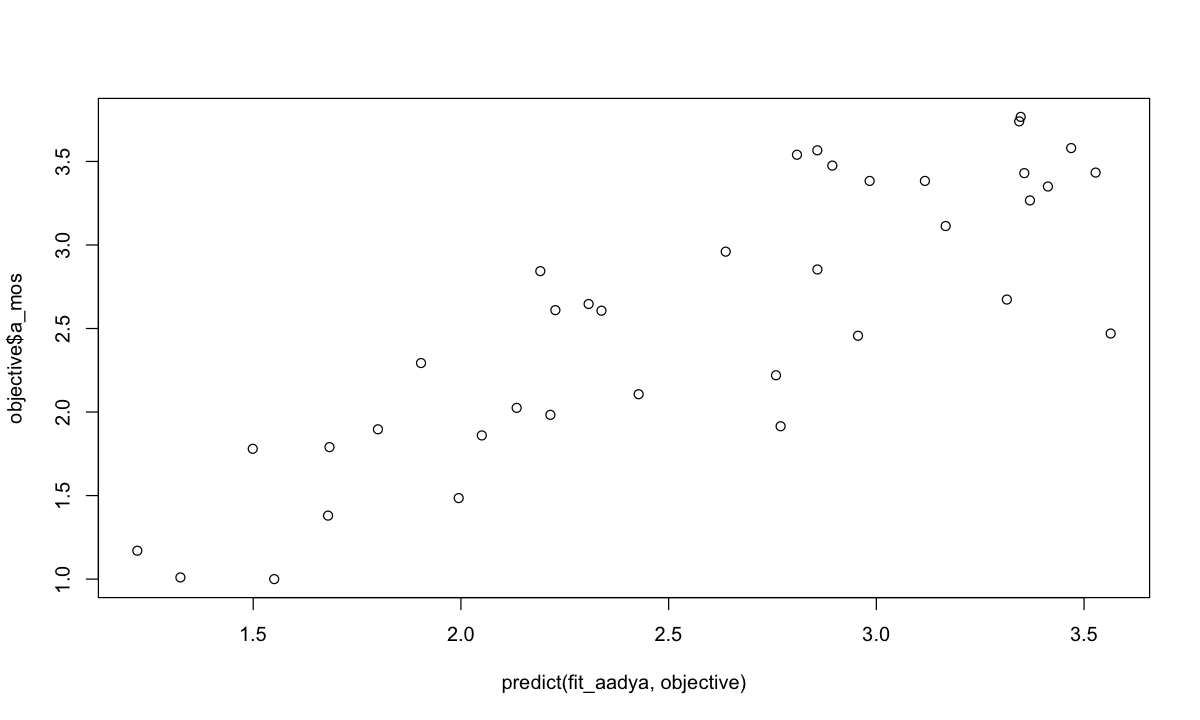

In [22]:
fit_aadya <- lm(a_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
    + avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google
    + distance + telstra_distance + urban + line_of_sight, data = objective)
summary(fit_aadya)
par(bg = "white")
predictions <- predict(fit_aadya, objective)
plot(predict(fit_aadya, objective), objective$a_mos)
#calculate mean squared error
mean((predictions - objective$a_mos)^2)

Start:  AIC=0.04
a_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + 
    sd_up_google + sd_rtt_google + distance + telstra_distance + 
    urban + line_of_sight

                   Df Sum of Sq    RSS      AIC
- sd_jitter_aadya   1   0.00000 6.9325 -1.96405
- urban             1   0.00018 6.9326 -1.96312
- line_of_sight     1   0.00031 6.9328 -1.96241
- sd_pl_ellen       1   0.00126 6.9337 -1.95731
- sd_rtt_aadya      1   0.00277 6.9352 -1.94926
- sd_rtt_ellen      1   0.00280 6.9353 -1.94912
- avg_down_google   1   0.00291 6.9354 -1.94850
- avg_rtt_aadya     1   0.00707 6.9395 -1.92634
- sd_up_aadya       1   0.00807 6.9405


Call:
lm(formula = a_mos ~ avg_rtt_ellen + avg_down_aadya + avg_pl_aadya + 
    sd_up_ellen + sd_down_ellen + sd_down_aadya + sd_pl_aadya + 
    sd_rtt_google + distance, data = objective)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3590 -0.2721  0.1065  0.2766  1.2928 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.371309   0.790390   6.796 2.68e-07 ***
avg_rtt_ellen  -0.088425   0.021372  -4.137 0.000307 ***
avg_down_aadya  0.022992   0.006218   3.698 0.000979 ***
avg_pl_aadya    0.675109   0.478113   1.412 0.169364    
sd_up_ellen    -0.054890   0.016747  -3.278 0.002879 ** 
sd_down_ellen   0.035805   0.013292   2.694 0.012000 *  
sd_down_aadya  -0.040237   0.011911  -3.378 0.002232 ** 
sd_pl_aadya    -0.397920   0.305276  -1.303 0.203418    
sd_rtt_google  -0.041279   0.012977  -3.181 0.003671 ** 
distance       -0.359630   0.280093  -1.284 0.210064    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residu

[1] 0.2406179

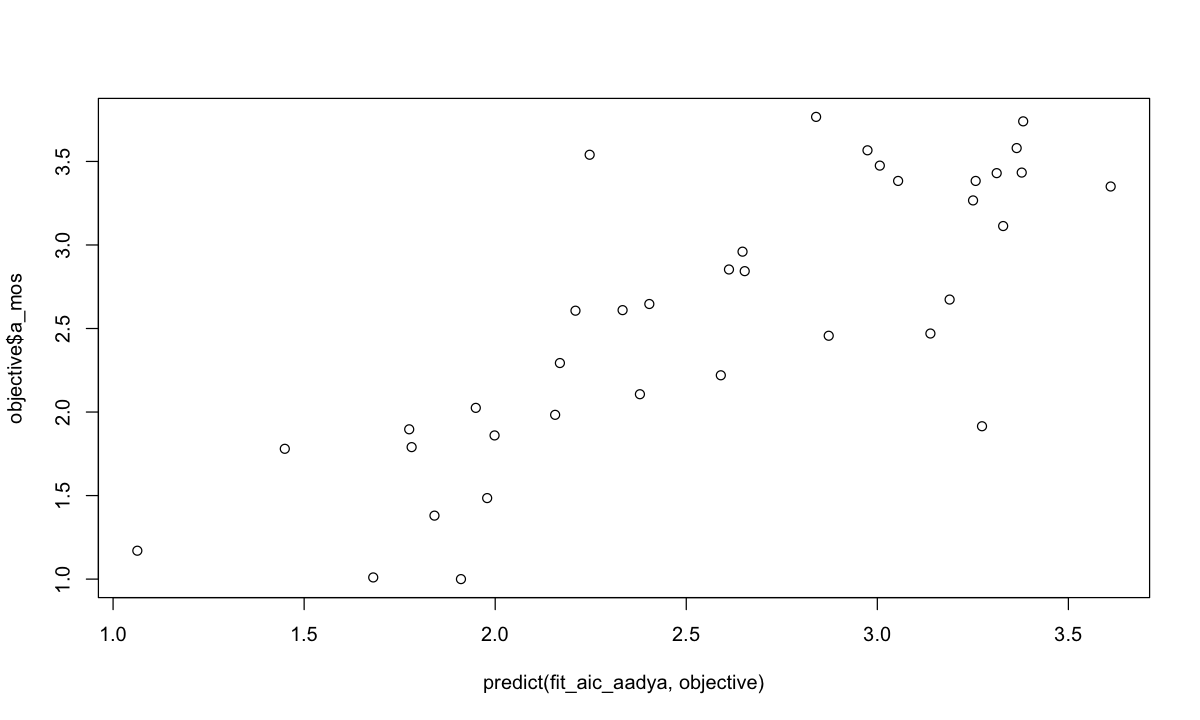

In [23]:
fit_aic_aadya <- step(fit_aadya) #stepwise regression to optimse a linear model
summary(fit_aic_aadya)
par(bg = "white")
plot(predict(fit_aic_aadya, objective), objective$a_mos)
mean((predict(fit_aic_aadya, objective) - objective$a_mos)^2)

Start:  AIC=49.97
a_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + 
    sd_up_google + sd_rtt_google + distance + telstra_distance + 
    urban + line_of_sight

                   Df Sum of Sq    RSS    AIC
- sd_jitter_aadya   1   0.00000 6.9325 46.363
- urban             1   0.00018 6.9326 46.364
- line_of_sight     1   0.00031 6.9328 46.365
- sd_pl_ellen       1   0.00126 6.9337 46.370
- sd_rtt_aadya      1   0.00277 6.9352 46.378
- sd_rtt_ellen      1   0.00280 6.9353 46.378
- avg_down_google   1   0.00291 6.9354 46.379
- avg_rtt_aadya     1   0.00707 6.9395 46.401
- sd_up_aadya       1   0.00807 6.9405 46.407
- avg_rtt


Call:
lm(formula = a_mos ~ avg_rtt_ellen + avg_down_aadya + sd_up_ellen + 
    sd_down_ellen + sd_down_aadya + sd_rtt_google, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35774 -0.30269 -0.02139  0.37568  1.26183 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.312746   0.792804   6.701    2e-07 ***
avg_rtt_ellen  -0.091699   0.021694  -4.227 0.000204 ***
avg_down_aadya  0.021719   0.006112   3.553 0.001281 ** 
sd_up_ellen    -0.051926   0.016825  -3.086 0.004334 ** 
sd_down_ellen   0.029996   0.012457   2.408 0.022401 *  
sd_down_aadya  -0.034739   0.011654  -2.981 0.005655 ** 
sd_rtt_google  -0.041245   0.012159  -3.392 0.001964 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5911 on 30 degrees of freedom
Multiple R-squared:  0.5677,	Adjusted R-squared:  0.4812 
F-statistic: 6.565 on 6 and 30 DF,  p-value: 0.000166


[1] 0.2833056

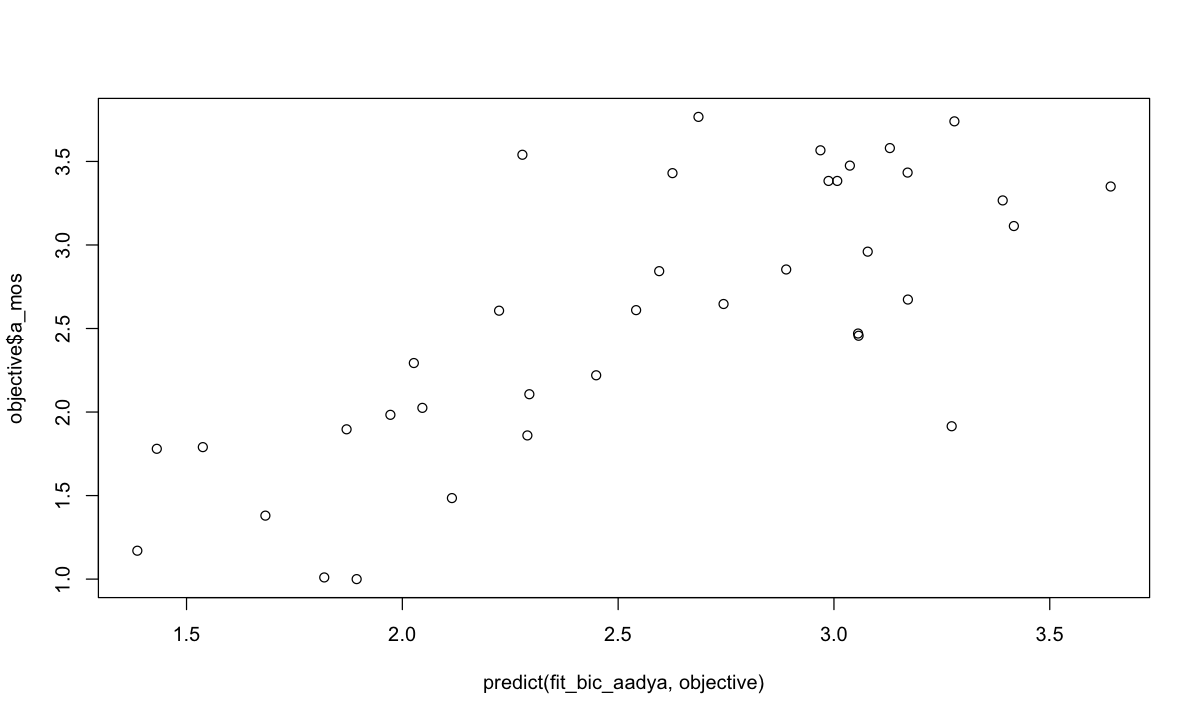

In [24]:
fit_bic_aadya <- step(fit_aadya, k = log(length(objective$a_mos)))
summary(fit_bic_aadya)
par(bg = "white")
plot(predict(fit_bic_aadya, objective), objective$a_mos)
mean((predict(fit_bic_aadya, objective) - objective$a_mos)^2)

# Rural only

In [25]:
objective$urban <- as.factor(objective$urban)

In [26]:
df_filtered <- objective[objective$urban == 0, ] #filter to only rural areas
# Fit the linear regression model
model <- lm(agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + log(avg_up_aadya) + log(avg_down_aadya) + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
    + log(avg_down_google) + log(avg_up_google) + telstra_distance + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google + distance
    , data = df_filtered)

# Summary of the model
model_summary <- summary(model)

# Extract coefficients and p-values
coefficients <- model_summary$coefficients

# Create a data frame with coefficients, p-values, and significance stars
output_df <- data.frame(
  Estimate = coefficients[, "Estimate"],
  `P-value` = coefficients[, "Pr(>|t|)"],
  Significance = cut(coefficients[, "Pr(>|t|)"],
                     breaks = c(-Inf, 0.001, 0.01, 0.05, 0.1, Inf),
                     labels = c("***", "**", "*", ".", " "),
                     right = FALSE)
)

# Print the formatted output
cat("Coefficients, P-values, and Significance:\n")
print(output_df)

Coefficients, P-values, and Significance:
                         Estimate    P.value Significance
(Intercept)          -51.30789042 0.01907697            *
log(avg_up_ellen)      1.86923216 0.02163401            *
log(avg_down_ellen)    5.73820445 0.02686673            *
avg_rtt_ellen          1.47511686 0.01750984            *
avg_ellen_jitter       0.70087374 0.02801828            *
avg_pl_ellen           0.37059431 0.02024152            *
log(avg_up_aadya)      2.00816302 0.01417981            *
log(avg_down_aadya)    1.73198888 0.01985992            *
avg_rtt_aadya         -1.12236013 0.02608340            *
avg_jitter_aadya       0.56703246 0.01795709            *
avg_pl_aadya          10.63426955 0.01785308            *
sd_up_ellen           -0.54213315 0.02359370            *
sd_down_ellen         -0.42958741 0.01775768            *
sd_rtt_ellen          -2.52741580 0.02145256            *
sd_jitter_ellen        0.17219135 0.01944945            *
sd_pl_ellen            1.95901

In [27]:
# Load necessary library
library(glmnet)

# Prepare the data (ensure your response variable is numeric)
x <- model.matrix(agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + 
                    avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + 
                    log(avg_down_aadya) + avg_rtt_aadya + avg_jitter_aadya + 
                    avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
                    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
                    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + 
                    sd_jitter_aadya + sd_pl_aadya + log(avg_down_google) + 
                    log(avg_up_google) + avg_rtt_google + 
                    sd_down_google + sd_up_google + sd_rtt_google + 
                    distance + telstra_distance, data = df_filtered)

y <- df_filtered$agg_mos

# Fit Lasso regression model (alpha = 1 for Lasso)
lasso_model <- glmnet(x, y, alpha = 1)


Best alpha: 1 
[1] 0.08153803


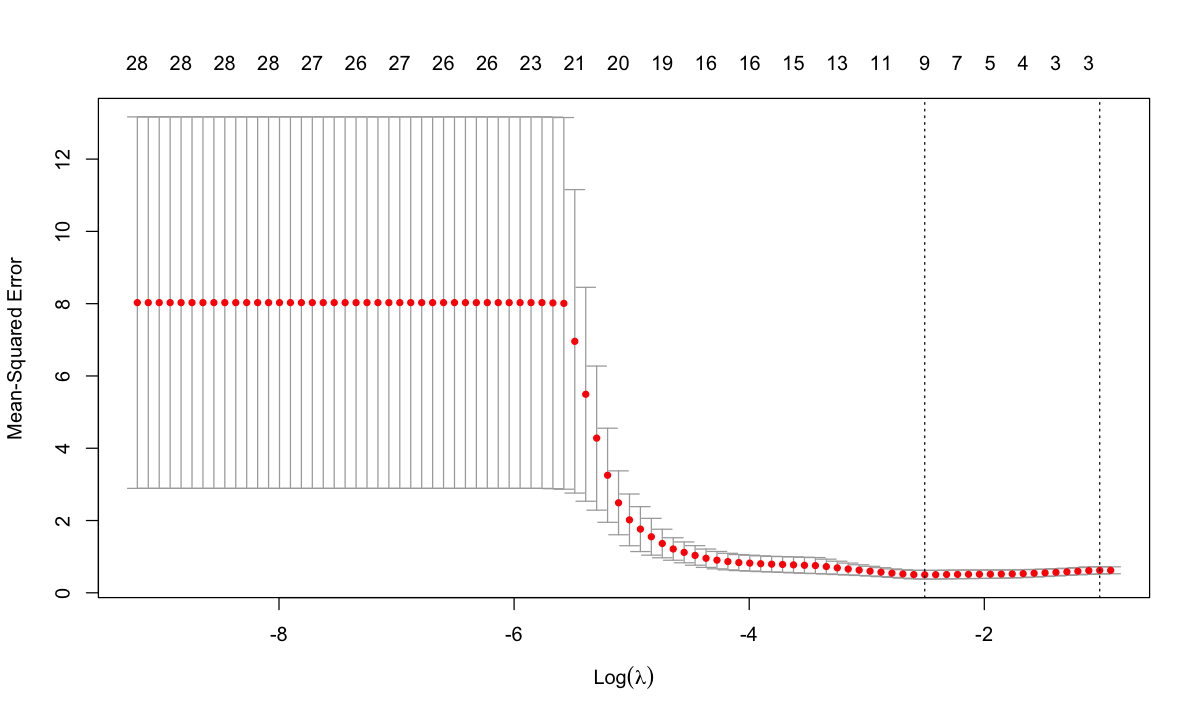

In [28]:
# Find the best alpha
best_alpha <- cv_alpha(x, y)
cat("Best alpha:", best_alpha, "\n")

# Fit the model with the best alpha
cv_model_best <- cv.glmnet(x, y, alpha = best_alpha)

# Plot the cross-validation curve
par(bg= "white")
plot(cv_model_best)

# Get the best lambda
best_lambda <- cv_model_best$lambda.min
print(best_lambda)

# Fit the final model with the best alpha and lambda
final_model_best <- glmnet(x, y, alpha = best_alpha, lambda = best_lambda)



Call:
glm(formula = formula, data = df_filtered)

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)           0.513807   1.283947   0.400  0.69327   
log(avg_down_ellen)   0.635511   0.214655   2.961  0.00773 **
avg_rtt_ellen        -0.015901   0.017729  -0.897  0.38044   
log(avg_up_aadya)     0.294086   0.132616   2.218  0.03833 * 
avg_jitter_aadya     -0.005222   0.013586  -0.384  0.70477   
sd_up_ellen          -0.012818   0.013166  -0.974  0.34190   
sd_up_aadya          -0.046862   0.013873  -3.378  0.00299 **
log(avg_down_google) -0.543403   0.324599  -1.674  0.10968   
log(avg_up_google)   -0.326496   0.170484  -1.915  0.06989 . 
avg_rtt_google        0.012615   0.008777   1.437  0.16612   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.2017889)

    Null deviance: 16.2555  on 29  degrees of freedom
Residual deviance:  4.0358  on 20  degrees of freedom
AIC: 46.956

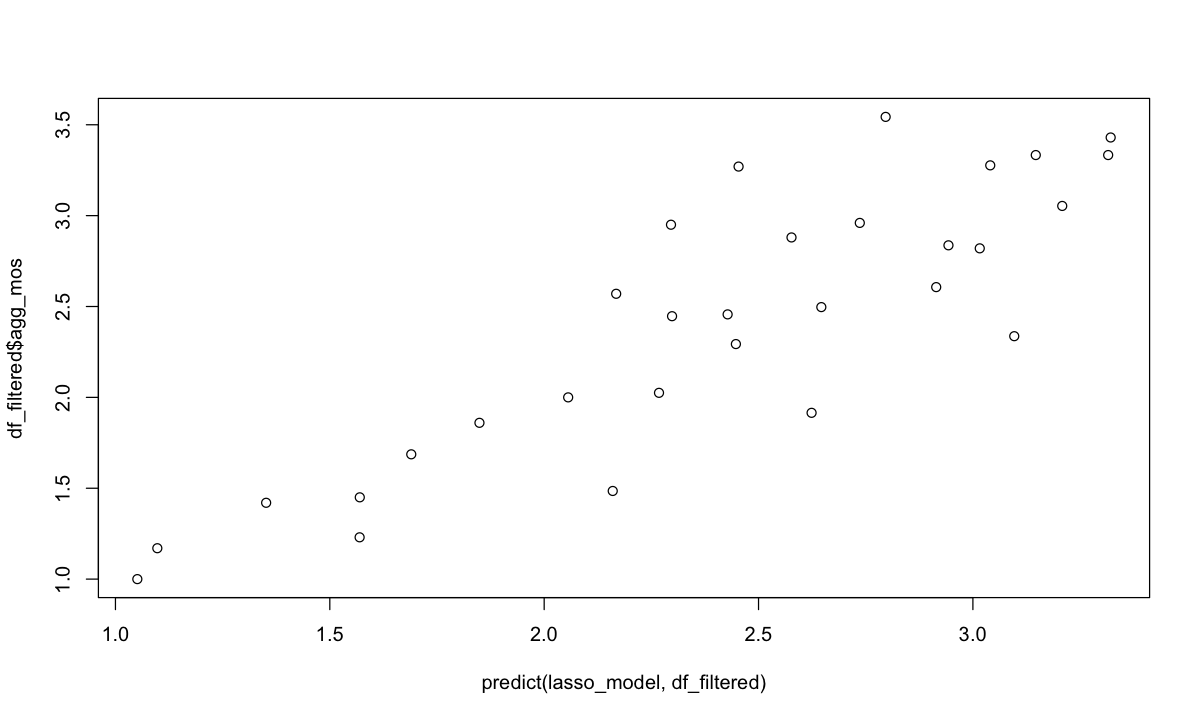

In [29]:
selected_vars <- rownames(coef(final_model_best))[-1][coef(final_model_best)[-1, 1] != 0]

# Create a formula for the selected variables
formula <- as.formula(paste("agg_mos ~", paste(selected_vars, collapse = " + ")))

# Fit a standard logistic regression model
lasso_model <- glm(formula, data = df_filtered)
summary(lasso_model)
par(bg= "white")
plot(predict(lasso_model, df_filtered), df_filtered$agg_mos)

Start:  AIC=-196.45
agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + 
    avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + log(avg_down_aadya) + 
    avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + 
    sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + 
    sd_pl_aadya + log(avg_down_google) + log(avg_up_google) + 
    telstra_distance + avg_rtt_google + sd_down_google + sd_up_google + 
    sd_rtt_google + distance

                       Df Sum of Sq     RSS      AIC
<none>                              0.00131 -196.448
- sd_jitter_aadya       1   0.19837 0.19968  -49.261
- sd_down_aadya         1   0.40899 0.41030  -27.656
- sd_up_google          1   0.42062 0.42193  -26.818
- sd_pl_ellen           1   0.63545 0.63676  -14.471
- avg_ellen_jitter      1   0.67551 0.67682  -12.641
- telstra_distance      1   0.70334 0.70465  -11.432
- log(avg_down_ellen)   1   0.73473

[1] 4.367092e-05


Call:
lm(formula = agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + 
    avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + 
    log(avg_down_aadya) + avg_rtt_aadya + avg_jitter_aadya + 
    avg_pl_aadya + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + 
    sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + sd_down_aadya + 
    sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + log(avg_down_google) + 
    log(avg_up_google) + telstra_distance + avg_rtt_google + 
    sd_down_google + sd_up_google + sd_rtt_google + distance, 
    data = df_filtered)

Residuals:
         1          2          3          4          5          6          7 
-1.171e-02  4.531e-03 -2.903e-05  8.197e-04 -3.203e-04 -2.079e-03 -6.233e-04 
         8          9         10         11         12         13         14 
 7.379e-05 -1.598e-02 -2.743e-03  2.626e-04  3.706e-03  8.461e-03 -5.116e-03 
        15         16         17         18         19         20         21 
-1.020e-02  5.933e-03 -4.199e-03

Coefficients, P-values, and Significance:
                         Estimate    P.value Significance
(Intercept)          -51.30789042 0.01907697            *
log(avg_up_ellen)      1.86923216 0.02163401            *
log(avg_down_ellen)    5.73820445 0.02686673            *
avg_rtt_ellen          1.47511686 0.01750984            *
avg_ellen_jitter       0.70087374 0.02801828            *
avg_pl_ellen           0.37059431 0.02024152            *
log(avg_up_aadya)      2.00816302 0.01417981            *
log(avg_down_aadya)    1.73198888 0.01985992            *
avg_rtt_aadya         -1.12236013 0.02608340            *
avg_jitter_aadya       0.56703246 0.01795709            *
avg_pl_aadya          10.63426955 0.01785308            *
sd_up_ellen           -0.54213315 0.02359370            *
sd_down_ellen         -0.42958741 0.01775768            *
sd_rtt_ellen          -2.52741580 0.02145256            *
sd_jitter_ellen        0.17219135 0.01944945            *
sd_pl_ellen            1.95901

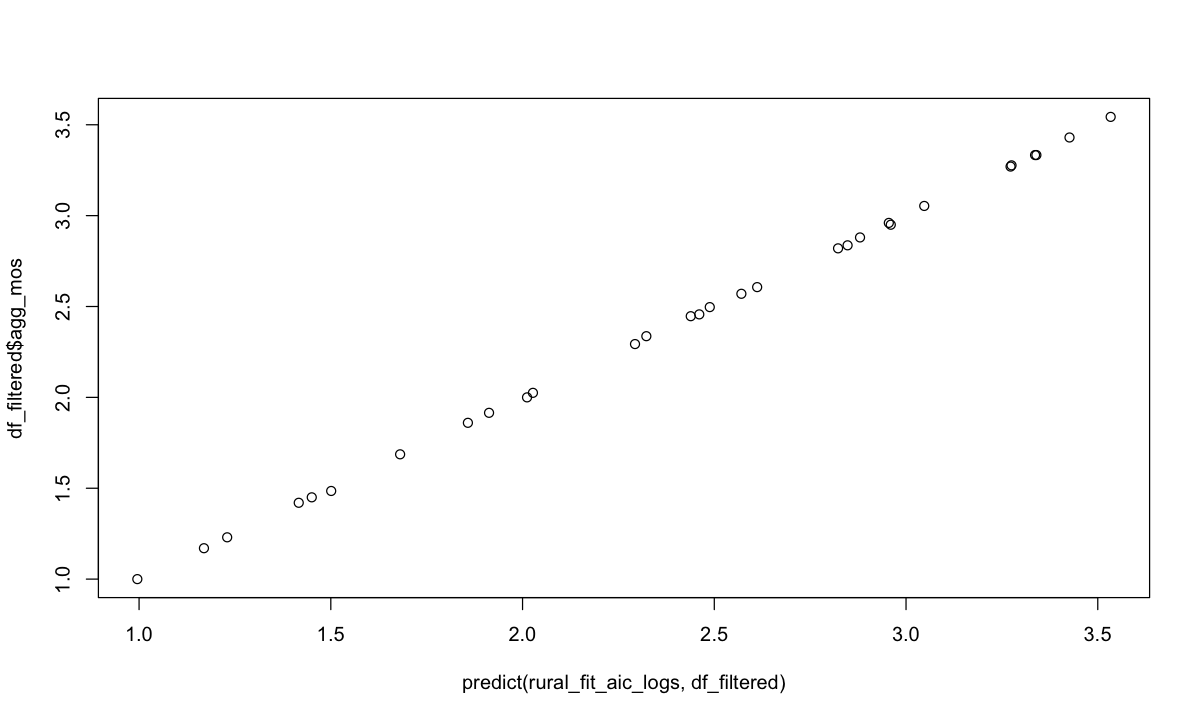

In [30]:
rural_fit_aic_logs <- step(model, k = log(length(objective$agg_mos)))

par(bg = "white")
options(repr.plot.width = 10, repr.plot.height = 6)
plot(predict(rural_fit_aic_logs, df_filtered), df_filtered$agg_mos)
mean((predict(rural_fit_aic_logs, df_filtered) - df_filtered$agg_mos)^2)
summary(rural_fit_aic_logs)
model_summary <- summary(rural_fit_aic_logs)

# Extract coefficients and p-values
coefficients <- model_summary$coefficients

# Create a data frame with coefficients, p-values, and significance stars
output_df <- data.frame(
  Estimate = coefficients[, "Estimate"],
  `P-value` = coefficients[, "Pr(>|t|)"],
  Significance = cut(coefficients[, "Pr(>|t|)"],
                     breaks = c(-Inf, 0.001, 0.01, 0.05, 0.1, Inf),
                     labels = c("***", "**", "*", ".", " "),
                     right = FALSE)
)

# Print the formatted output
cat("Coefficients, P-values, and Significance:\n")
print(output_df)